In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('Toyota.csv')

In [3]:
df

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986,Diesel,90,1.0,0,2000,three,1165
1,1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165
2,2,13950,24.0,41711,Diesel,90,NaN,0,2000,3,1165
3,3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,1431,7500,NaN,20544,Petrol,86,1.0,0,1300,3,1025
1432,1432,10845,72.0,??,Petrol,86,0.0,0,1300,3,1015
1433,1433,8500,NaN,17016,Petrol,86,0.0,0,1300,3,1015
1434,1434,7250,70.0,??,NaN,86,1.0,0,1300,3,1015


In [4]:
df = df.drop('Unnamed: 0', axis=1)

In [5]:
df

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1.0,0,2000,three,1165
1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165
2,13950,24.0,41711,Diesel,90,NaN,0,2000,3,1165
3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,NaN,20544,Petrol,86,1.0,0,1300,3,1025
1432,10845,72.0,??,Petrol,86,0.0,0,1300,3,1015
1433,8500,NaN,17016,Petrol,86,0.0,0,1300,3,1015
1434,7250,70.0,??,NaN,86,1.0,0,1300,3,1015


## Will perform Outlier Analysis via IQR on KM

First, we need to clean up the attribute and remove incorrect values such as "??"

In [6]:
df['KM'].dtype

dtype('O')

In [7]:
df['KM'].sample(frac=1).head(20)

730      85889
540      46391
41       44068
974      47060
569      36000
1047    207114
497      58377
36       25000
740      82723
589      27500
1166     97000
269      48945
590      26938
885      61254
1392     49827
536      47211
1302     70932
195     118217
1115    115157
63       33511
Name: KM, dtype: object

In [8]:
df[df['KM'] == '??']

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
6,16900,27.0,??,Diesel,????,NaN,0,2000,3,1245
64,17950,27.0,??,Petrol,97,1.0,0,1400,5,1110
91,22250,20.0,??,Diesel,90,1.0,0,2000,3,1260
112,24950,8.0,??,Diesel,116,1.0,0,2000,5,1320
125,21750,16.0,??,Petrol,110,1.0,0,1600,5,1130
131,15950,20.0,??,Petrol,97,1.0,0,1400,5,1110
398,10500,55.0,??,Petrol,110,1.0,0,1600,4,1035
491,10750,54.0,??,Petrol,110,1.0,0,1600,5,1075
1049,6750,77.0,??,Diesel,72,1.0,0,2000,4,1100
1120,7350,72.0,??,Petrol,86,1.0,0,1300,3,1015


To clean the data, we will first replace the *missing* values with -1, then replace -1 with the actual mean of the data

In [9]:
df['KM'] = df['KM'].replace('??', np.nan)

In [10]:
df['KM'].sample(frac=1).head(20)

404     104805
1345     61648
1058    172980
512      53268
1393     49640
86        7000
192     131273
316      37389
15       18739
233      61200
410      99865
787      75000
879      61930
1165     97085
909      58300
1359     59326
72       28817
599      10210
1162     97548
485      62280
Name: KM, dtype: object

In [11]:
df['KM'].isna().sum()

15

In [12]:
df['KM'].dtype

dtype('O')

In [13]:
df['KM'] = df['KM'].astype(float)

In [14]:
df['KM'].dtype

dtype('float64')

In [15]:
df['KM'].isna().sum()

15

In [16]:
df['KM'] = df['KM'].fillna(df['KM'].mean())

In [17]:
df['KM'].isna().sum()

0

In [18]:
df['KM'].sample(frac=1).head(20)

856      64950.0
375      16000.0
1185     91900.0
1302     70932.0
536      47211.0
803      73376.0
1250     78435.0
217      75697.0
878      61977.0
943      54000.0
818      70500.0
68       30000.0
286      44830.0
144      20270.0
498      58142.0
505      55877.0
839      67003.0
1203     88000.0
534      47451.0
1096    125400.0
Name: KM, dtype: float64

In [19]:
df['KM'] = df['KM'].astype(int)

In [20]:
considered_attribute = df['KM']

Q1 = considered_attribute.quantile(0.25)
Q3 = considered_attribute.quantile(0.75)

IQR = Q3 - Q1
print("IQR:", IQR)

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("LB:", lower_bound)
print("UB:", upper_bound)
print()

outliers = df[(df['KM'] < lower_bound) | (df['KM'] > upper_bound)]
print(outliers)

IQR: 43410.25
LB: -21609.625
UB: 152031.375

      Price   Age      KM FuelType   HP  MetColor  Automatic    CC Doors  \
186    6950  43.0  243000   Diesel   69       0.0          0  1900     3   
187    9500  38.0  180638   Diesel   90       0.0          0  2000     4   
188   11950  40.0  179860   Diesel   90       1.0          0  2000     5   
189    7750  43.0  178858      CNG  110       0.0          0  1600     3   
190   11950  40.0  161000   Diesel   69       1.0          0  1900     3   
191    4350  44.0  158320   Diesel   69       0.0          0  1800     5   
378    6500  53.0  216000   Diesel   69       0.0          0  1900     3   
379    6400  51.0  198167   Diesel   69       0.0          0  1900     4   
380    7000  53.0  176000   Diesel   69       0.0          0  1900     3   
381    7750  54.0  174139   Diesel   72       1.0          0  2000     4   
382    8900  45.0  174000   Diesel   69       NaN          0  1900     5   
603    6950  58.0  205000   Diesel   72    

Text(0.5, 1.0, 'Box Plot to Show Outliers')

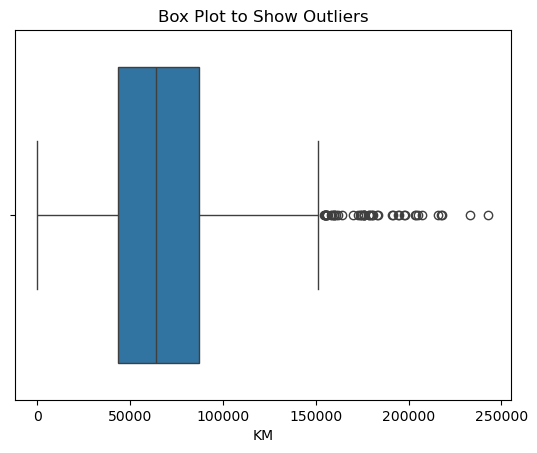

In [30]:
sns.boxplot(x=df['KM'])
plt.title("Box Plot to Show Outliers")

In [22]:
df

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1.0,0,2000,three,1165
1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165
2,13950,24.0,41711,Diesel,90,NaN,0,2000,3,1165
3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,NaN,20544,Petrol,86,1.0,0,1300,3,1025
1432,10845,72.0,68647,Petrol,86,0.0,0,1300,3,1015
1433,8500,NaN,17016,Petrol,86,0.0,0,1300,3,1015
1434,7250,70.0,68647,NaN,86,1.0,0,1300,3,1015


## Will perform Z-Score Analysis on Weight

In [23]:
df['Z-Score'] = stats.zscore(df['Weight'])

In [24]:
df

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,Z-Score
0,13500,23.0,46986,Diesel,90,1.0,0,2000,three,1165,1.758561
1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165,1.758561
2,13950,24.0,41711,Diesel,90,NaN,0,2000,3,1165,1.758561
3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165,1.758561
4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170,1.853577
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,NaN,20544,Petrol,86,1.0,0,1300,3,1025,-0.901883
1432,10845,72.0,68647,Petrol,86,0.0,0,1300,3,1015,-1.091915
1433,8500,NaN,17016,Petrol,86,0.0,0,1300,3,1015,-1.091915
1434,7250,70.0,68647,NaN,86,1.0,0,1300,3,1015,-1.091915


Usually, a Z-Score greater than +/-3 is considered an outlier.
So to find those:

In [25]:
outliers = df[df['Z-Score'].abs() > 3]
outliers

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,Z-Score
6,16900,27.0,68647,Diesel,????,NaN,0,2000,3,1245,3.278815
7,18600,30.0,75889,NaN,90,1.0,0,2000,3,1245,3.278815
43,16950,27.0,110404,Diesel,90,NaN,0,2000,5,1255,3.468847
44,16950,22.0,100250,NaN,90,0.0,0,2000,5,1255,3.468847
45,19000,23.0,84000,Diesel,90,NaN,0,2000,5,1270,3.753894
46,17950,27.0,79375,Diesel,90,1.0,0,2000,5,1255,3.468847
48,17950,22.0,72215,Diesel,90,1.0,0,2000,5,1255,3.468847
50,17950,22.0,62636,Diesel,90,1.0,0,2000,5,1255,3.468847
68,22250,22.0,30000,Diesel,110,1.0,0,2000,5,1275,3.848910
87,17950,20.0,66966,Diesel,90,1.0,0,2000,3,1245,3.278815


## Plotting a Scatter Plot using the Z-Scores

Text(0, 0.5, 'Z-Score')

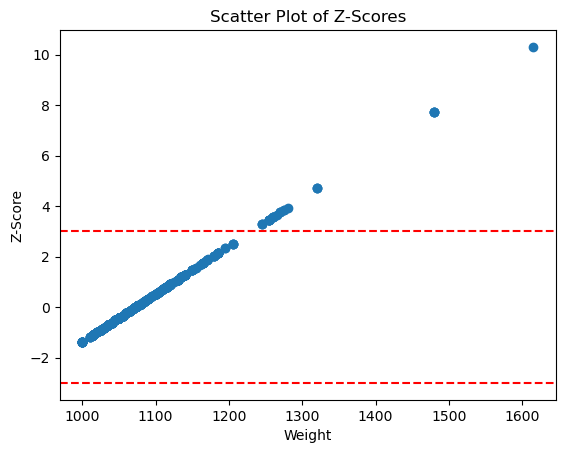

In [29]:
plt.scatter(df['Weight'], df['Z-Score'])
plt.axhline(y=3, color='red', linestyle='--')
plt.axhline(y=-3, color='red', linestyle='--')
plt.title("Scatter Plot of Z-Scores")
plt.xlabel("Weight")
plt.ylabel("Z-Score")

## Manual Implementation of Z-Scores

### Z-Score = $\frac{x - \bar x}{\sigma_x}$

In [32]:
weight_mean = df['Weight'].mean()
weight_mean

1072.4596100278552

In [33]:
weight_sd = df['Weight'].std()
weight_sd

52.6411204869316

In [34]:
df['Z-Score_Manual'] = (df['Weight'] - weight_mean)/weight_sd

In [35]:
df

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,Z-Score,Z-Score_Manual
0,13500,23.0,46986,Diesel,90,1.0,0,2000,three,1165,1.758561,1.757949
1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165,1.758561,1.757949
2,13950,24.0,41711,Diesel,90,NaN,0,2000,3,1165,1.758561,1.757949
3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165,1.758561,1.757949
4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170,1.853577,1.852931
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,NaN,20544,Petrol,86,1.0,0,1300,3,1025,-0.901883,-0.901569
1432,10845,72.0,68647,Petrol,86,0.0,0,1300,3,1015,-1.091915,-1.091535
1433,8500,NaN,17016,Petrol,86,0.0,0,1300,3,1015,-1.091915,-1.091535
1434,7250,70.0,68647,NaN,86,1.0,0,1300,3,1015,-1.091915,-1.091535


Text(0, 0.5, 'Manual Z-Score')

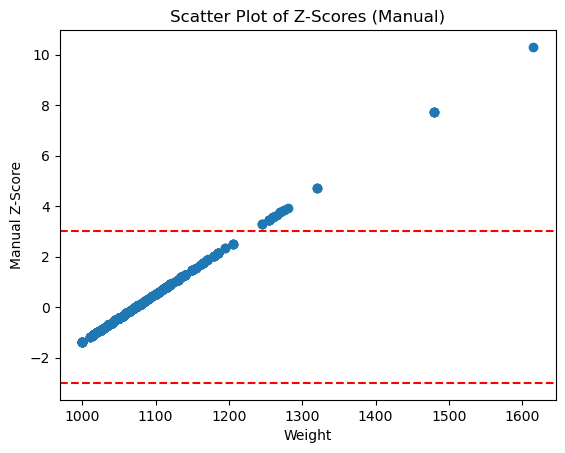

In [37]:
plt.scatter(df['Weight'], df['Z-Score_Manual'])
plt.axhline(y=3, color='red', linestyle='--')
plt.axhline(y=-3, color='red', linestyle='--')
plt.title("Scatter Plot of Z-Scores (Manual)")
plt.xlabel("Weight")
plt.ylabel("Manual Z-Score")